In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
data = pd.read_csv(r'C:\Users\shikukumwam\OneDrive - Telecom Namibia\Desktop\Data Science\DATASETS\Predictive Analytics\Customer Churn.csv')

In [5]:
data.shape

(3150, 14)

In [6]:
data.columns.tolist()

['Call  Failure',
 'Complains',
 'Subscription  Length',
 'Charge  Amount',
 'Seconds of Use',
 'Frequency of use',
 'Unnamed: 6',
 'Distinct Called Numbers',
 'Age Group',
 'Tariff Plan',
 'Status',
 'Age',
 'Customer Value',
 'Churn']

In [7]:
data.head(15)

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Unnamed: 6,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
0,8,0.0,38.0,0.0,4370.0,71.0,5,17.0,3,1,1,30,197.640,0.0
1,0,0.0,39.0,0.0,318.0,5.0,7,4.0,2,1,2,25,46.035,0.0
2,10,0.0,37.0,0.0,2453.0,60.0,359,24.0,3,1,1,30,1536.520,0.0
3,10,0.0,38.0,0.0,4198.0,66.0,1,35.0,1,1,1,15,240.020,0.0
4,3,0.0,38.0,0.0,2393.0,58.0,2,33.0,1,1,1,15,145.805,0.0
5,11,0.0,38.0,1.0,NaN,82.0,32,28.0,3,1,1,30,282.280,0.0
6,4,0.0,38.0,0.0,2360.0,39.0,285,18.0,3,1,1,30,1235.960,0.0
7,13,0.0,37.0,2.0,9115.0,121.0,144,43.0,3,1,1,30,945.440,0.0
8,7,0.0,38.0,0.0,13773.0,169.0,0,44.0,3,1,1,30,557.680,0.0
9,7,0.0,38.0,1.0,4515.0,83.0,2,25.0,3,1,1,30,191.920,0.0


In [8]:
data.tail(5)

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Unnamed: 6,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
3145,21,0.0,19.0,2.0,6697.0,147.0,92,44.0,2,2,1,25,721.98,0.0
3146,17,0.0,17.0,1.0,9237.0,177.0,80,42.0,5,1,1,55,261.21,0.0
3147,13,0.0,18.0,4.0,3157.0,51.0,38,21.0,3,1,1,30,280.32,0.0
3148,7,0.0,11.0,2.0,4695.0,46.0,222,12.0,3,1,1,30,1077.64,0.0
3149,8,1.0,11.0,2.0,1792.0,NaN,7,9.0,3,1,1,30,100.68,1.0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3149 non-null   float64
 2   Subscription  Length     3147 non-null   float64
 3   Charge  Amount           3149 non-null   float64
 4   Seconds of Use           3147 non-null   float64
 5   Frequency of use         3148 non-null   float64
 6   Unnamed: 6               3150 non-null   int64  
 7   Distinct Called Numbers  3149 non-null   float64
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3149 non-null   float64
dtypes: float64(8), int64(6)


In [10]:
data.isnull().sum()

Call  Failure              0
Complains                  1
Subscription  Length       3
Charge  Amount             1
Seconds of Use             3
Frequency of use           2
Unnamed: 6                 0
Distinct Called Numbers    1
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      1
dtype: int64

In [11]:
data.rename(columns={data.columns[6]: 'Frequency of SMS'}, inplace=True)

In [12]:
data.isnull().sum()

Call  Failure              0
Complains                  1
Subscription  Length       3
Charge  Amount             1
Seconds of Use             3
Frequency of use           2
Frequency of SMS           0
Distinct Called Numbers    1
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      1
dtype: int64

In [23]:
data.dtypes

Call  Failure                int64
Complains                  float64
Subscription  Length       float64
Charge  Amount             float64
Seconds of Use             float64
Frequency of use           float64
Frequency of SMS             int64
Distinct Called Numbers    float64
Age Group                    int64
Tariff Plan                  int64
Status                       int64
Age                          int64
Customer Value             float64
Churn                      float64
dtype: object

In [25]:
data.Complains.mean()

0.07653223245474754

In [27]:
complains_av= data.Complains.mean()

In [29]:
data['Complains'].fillna(complains_av, inplace=True)

In [31]:
print(data['Complains'].isnull().sum())

0


In [32]:
column_means= data[[ 'Subscription  Length', 'Charge  Amount', 'Seconds of Use', 'Frequency of use', 'Distinct Called Numbers','Churn']].mean()

In [34]:
columns_with_missing = ['Subscription  Length', 'Charge  Amount', 'Seconds of Use', 'Frequency of use', 'Distinct Called Numbers','Churn']

In [35]:
for col in columns_with_missing:
    column_mean = data[col].mean()
    data[col].fillna(column_mean, inplace=True)

In [39]:
data.isnull().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

In [40]:
data.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076532,32.544010,0.942839,4472.772482,69.486658,73.174921,23.514767,2.826032,1.077778,1.248254,30.998413,470.972916,0.157193
std,7.263886,0.265848,8.572309,1.521072,4197.720995,57.403953,112.237560,17.215118,0.892555,0.267864,0.432069,8.831095,517.015433,0.363982
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2991.500000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


In [41]:
data.describe(include='all')

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076532,32.544010,0.942839,4472.772482,69.486658,73.174921,23.514767,2.826032,1.077778,1.248254,30.998413,470.972916,0.157193
std,7.263886,0.265848,8.572309,1.521072,4197.720995,57.403953,112.237560,17.215118,0.892555,0.267864,0.432069,8.831095,517.015433,0.363982
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2991.500000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


In [43]:
for col in data.columns:
    print(f"{col}: {data[col].nunique()} unique values")

Call  Failure: 37 unique values
Complains: 3 unique values
Subscription  Length: 46 unique values
Charge  Amount: 12 unique values
Seconds of Use: 1757 unique values
Frequency of use: 243 unique values
Frequency of SMS: 405 unique values
Distinct Called Numbers: 93 unique values
Age Group: 5 unique values
Tariff Plan: 2 unique values
Status: 2 unique values
Age: 5 unique values
Customer Value: 2654 unique values
Churn: 3 unique values


In [44]:
data['Churn'].value_counts()

Churn
0.000000    2654
1.000000     495
0.157193       1
Name: count, dtype: int64

In [45]:
data['Churn'].value_counts(normalize=True) * 100  # Percentage distribution

Churn
0.000000    84.253968
1.000000    15.714286
0.157193     0.031746
Name: proportion, dtype: float64

In [47]:
# Define lists of columns
numerical_cols = ['Subscription  Length', 'Charge Amount', 'Seconds of Use', 
                 'Frequency of use', 'Customer Value'] 
categorical_cols = ['Tariff Plan', 'Age Group', 'Status']

In [49]:
print(data['Subscription  Length'].dtype) 

float64


In [50]:
print(data['Subscription  Length'].isnull().sum())

0


C:\Users\shikukumwam\AppData\Local\anaconda3.1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


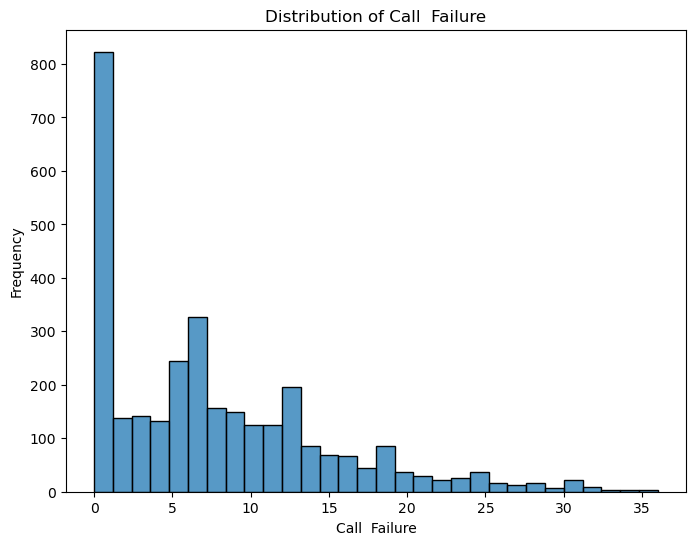

C:\Users\shikukumwam\AppData\Local\anaconda3.1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


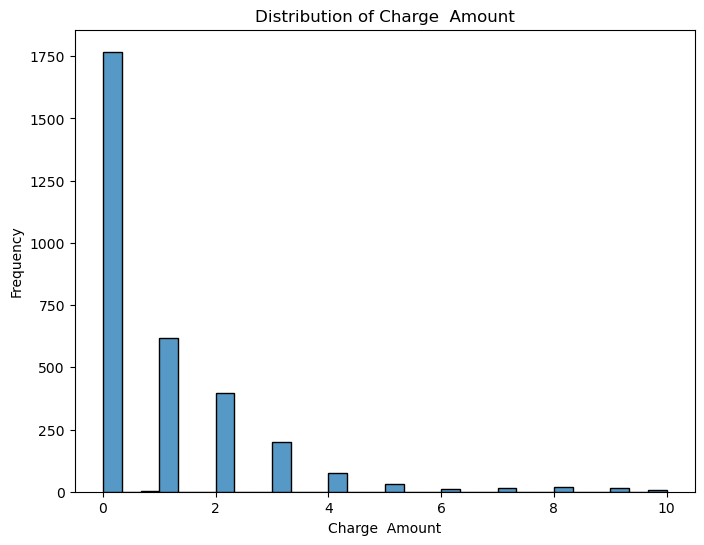

C:\Users\shikukumwam\AppData\Local\anaconda3.1\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


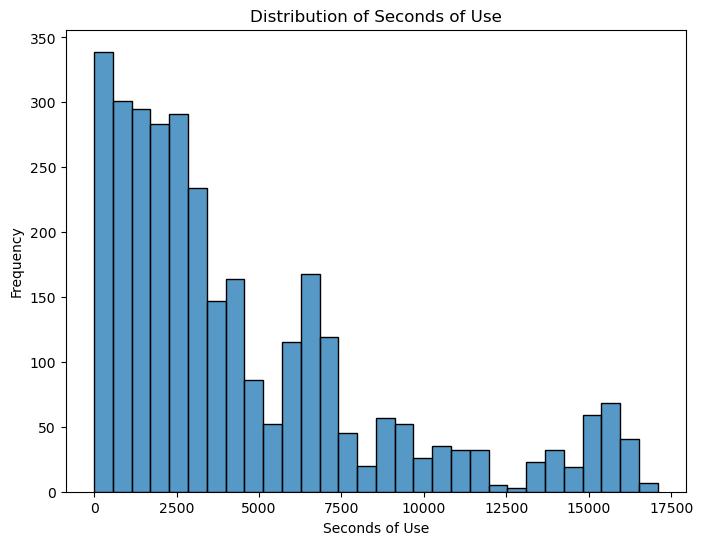

In [54]:
# Use the exact column name with two spaces
numerical_cols = ['Call  Failure', 'Charge  Amount', 'Seconds of Use']  # etc.

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

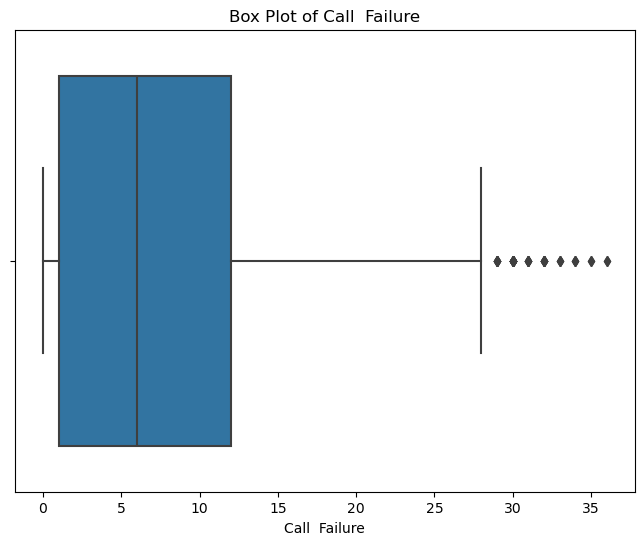

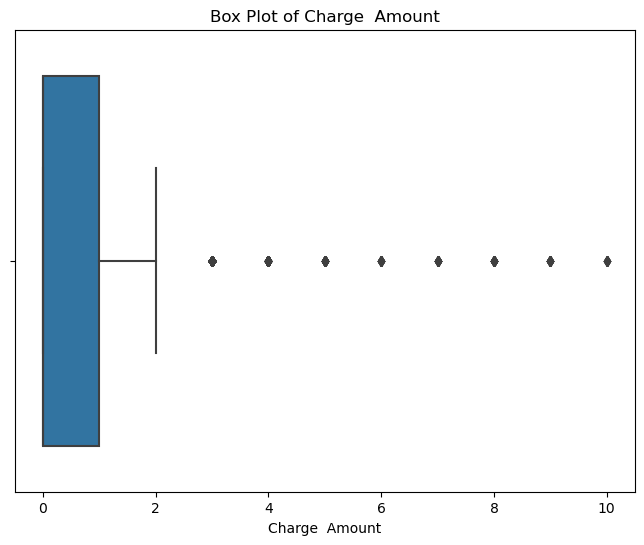

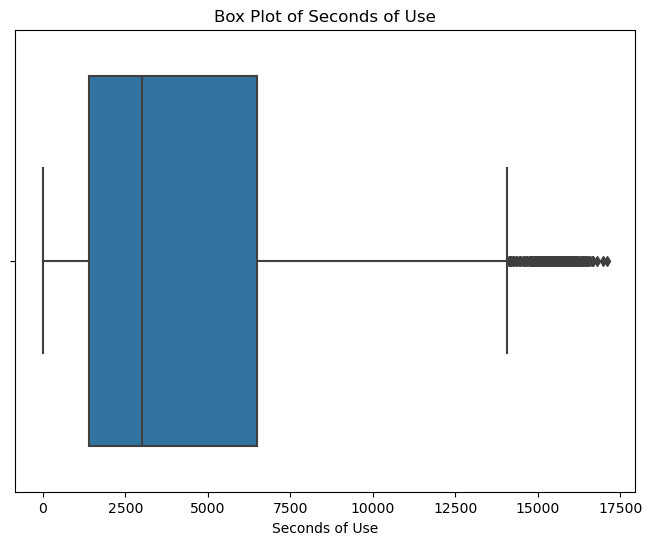

In [55]:
# Box plots for potential outliers
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col, data=data) 
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

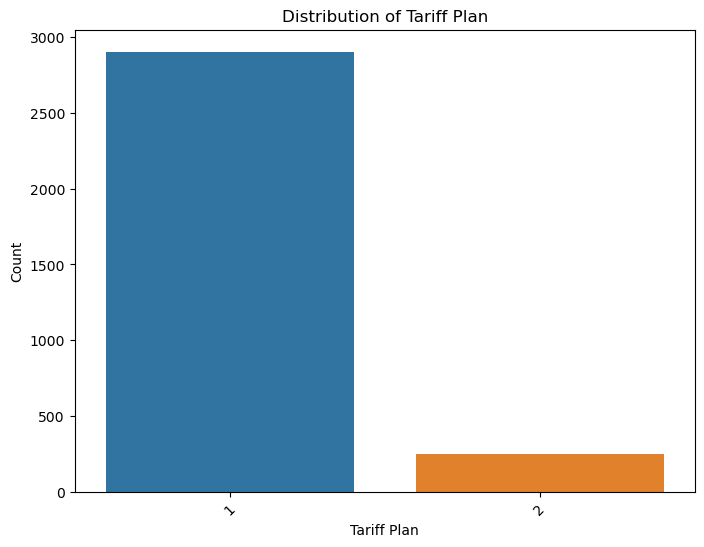

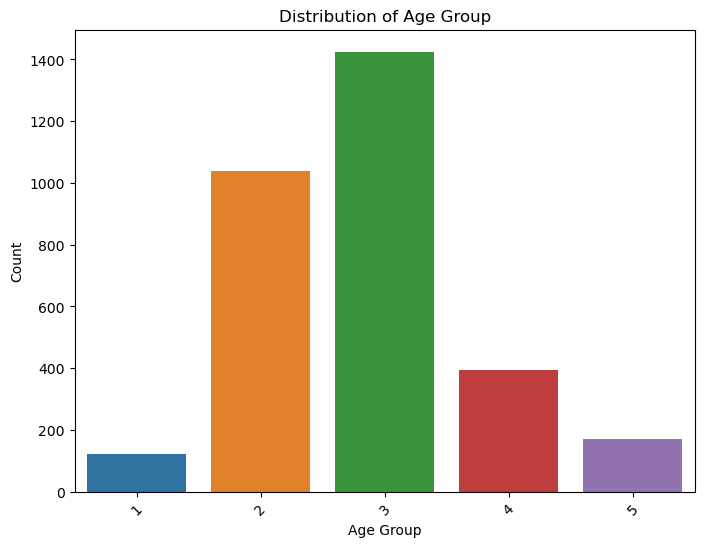

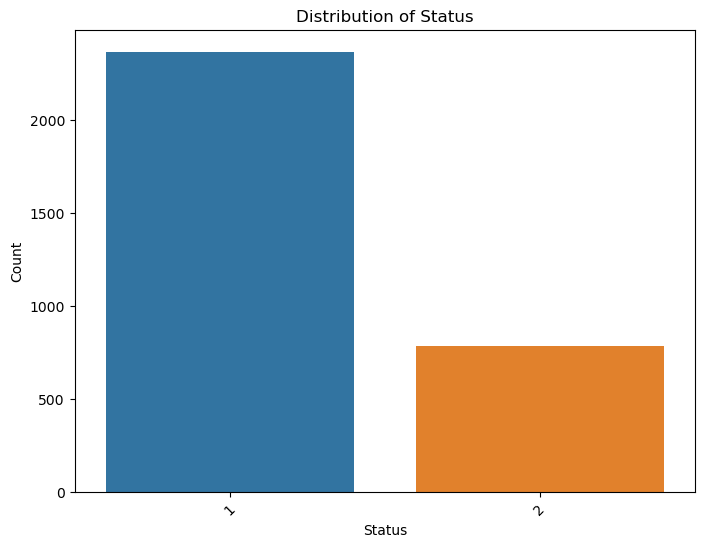

In [57]:
for col in categorical_cols:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=col, data=data)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.show()

In [59]:
# Create new features
data['Usage_Per_Day'] = data['Seconds of Use'] / data['Subscription  Length'] 
data['Call_Failure_Rate'] = data['Call  Failure'] / data['Frequency of use'] 
data['Complaints_Per_Use'] = data['Complains'] / data['Frequency of use'] 

In [61]:
data['Call_Failure_Rate'] = data['Call_Failure_Rate'].replace([np.inf, -np.inf], 0)
data['Complaints_Per_Use'] = data['Complaints_Per_Use'].replace([np.inf, -np.inf], 0)

In [67]:
# Using pandas' get_dummies() function
data = pd.get_dummies(data, columns=['Tariff Plan', 'Age Group', 'Status'], prefix=['Tariff', 'Age', 'Status'])

In [69]:
# Ensure consistent encoding for the target variable 
data['Churn'] = data['Churn'].astype(int) 

In [71]:


y = data['Churn'] 


In [73]:
imputer = SimpleImputer(strategy='median')

In [75]:
# Drop target column to get features
X = data.drop(['Churn'], axis=1)

# Target column
y = data['Churn']


In [77]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
X_train_imputed = imputer.fit_transform(X_train) 
X_test_imputed = imputer.transform(X_test)

In [81]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [83]:
from sklearn.impute import SimpleImputer

In [85]:
# Create and train a Logistic Regression model
model = LogisticRegression(max_iter=5000) 
model.fit(X_train_imputed, y_train) 

LogisticRegression(max_iter=5000)

In [86]:
# Make predictions on the test set
y_pred = model.predict(X_test_imputed) 


In [87]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred)) 

Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       520
           1       0.73      0.45      0.55       110

    accuracy                           0.87       630
   macro avg       0.81      0.71      0.74       630
weighted avg       0.86      0.87      0.86       630

[[502  18]
 [ 61  49]]


In [88]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Create a pipeline: Imputation + Logistic Regression
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # or 'median' / 'most_frequent'
    ('classifier', LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000))
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Evaluate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.96      0.83      0.89       520
           1       0.51      0.85      0.64       110

    accuracy                           0.83       630
   macro avg       0.74      0.84      0.76       630
weighted avg       0.88      0.83      0.85       630

[[430  90]
 [ 16  94]]


C:\Users\shikukumwam\AppData\Local\anaconda3.1\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [92]:
from xgboost import XGBClassifier

model = XGBClassifier(scale_pos_weight=(len(y_train[y_train==0])/len(y_train[y_train==1])), random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.96      0.97       520
           1       0.83      0.88      0.85       110

    accuracy                           0.95       630
   macro avg       0.90      0.92      0.91       630
weighted avg       0.95      0.95      0.95       630



In [94]:
import joblib

joblib.dump(model, 'churn_xgboost_model.pkl')


['churn_xgboost_model.pkl']

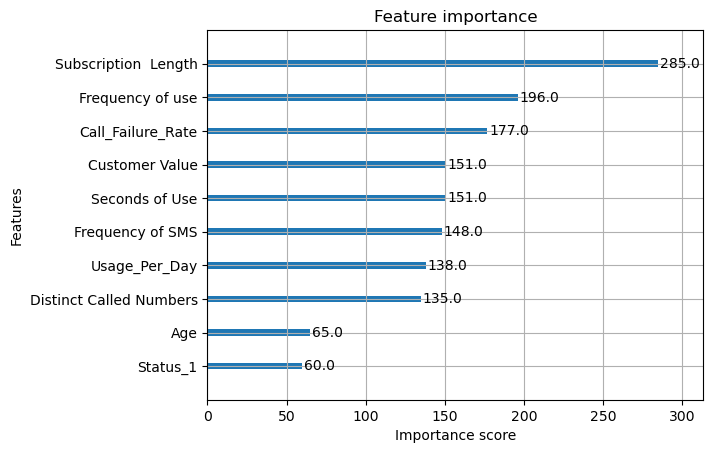

In [95]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

plot_importance(model, max_num_features=10)
plt.show()


In [96]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler()),
    ('model', XGBClassifier(scale_pos_weight=(len(y_train[y_train==0])/len(y_train[y_train==1])), random_state=42))
])

In [97]:
import joblib
joblib.dump(pipeline, 'churn_pipeline.pkl')

['churn_pipeline.pkl']

In [103]:
from fastapi import FastAPI
from pydantic import BaseModel
import joblib
import numpy as np

try:
    pipeline = joblib.load('churn_pipeline.pkl')
except Exception as e:
    raise RuntimeError(f"Failed to load pipeline: {str(e)}")
app = FastAPI(title="Churn Prediction API")

class CustomerInput(BaseModel):
    features: list

@app.post("/predict")
def predict_churn(data: CustomerInput):
    X = np.array(data.features).reshape(1, -1)
    X = imputer.transform(X)
    X = scaler.transform(X)
    pred = model.predict(X)[0]
    prob = model.predict_proba(X)[0][1]
    return {
        "churn_prediction": int(pred),
        "churn_probability": round(float(prob), 2)
    }


In [106]:
import joblib
model = joblib.load('churn_xgboost_model.pkl')
print(type(model))


<class 'xgboost.sklearn.XGBClassifier'>


In [108]:
import requests

# Example features (replace with YOUR model's expected features)
sample_data = {
    "features": [500, 1, 0.5, 100.25, ...]  # Must match training data shape!
}

response = requests.post(
    "http://localhost:8000/predict",
    json=sample_data
)

print(response.json())

TypeError: Object of type ellipsis is not JSON serializable

In [110]:
# Get feature names (run this in your TRAINING notebook)
print("Features your model expects (in order):")
print(X_train.columns.tolist())  # Replace X_train with your actual training data

# Get number of features
print(f"\nNumber of features required: {len(X_train.columns)}")

Features your model expects (in order):
['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount', 'Seconds of Use', 'Frequency of use', 'Frequency of SMS', 'Distinct Called Numbers', 'Age', 'Customer Value', 'Usage_Per_Day', 'Call_Failure_Rate', 'Complaints_Per_Use', 'Tariff_1', 'Tariff_2', 'Age_1', 'Age_2', 'Age_3', 'Age_4', 'Age_5', 'Status_1', 'Status_2']

Number of features required: 22


In [112]:
import requests

# ✅ Exact feature order from your model (22 values required)
sample_data = {
    "features": [
        5,      # Call Failure (e.g., number of failed calls)
        0,      # Complains (0=no, 1=yes)
        12,     # Subscription Length (months)
        50.99,  # Charge Amount (currency)
        1200,   # Seconds of Use
        15,     # Frequency of use (calls/day)
        10,     # Frequency of SMS (messages/day)
        25,     # Distinct Called Numbers
        35,     # Age (years)
        200.50, # Customer Value (monetary)
        2.5,    # Usage_Per_Day (hours)
        0.1,    # Call_Failure_Rate (ratio)
        0.0,    # Complaints_Per_Use (ratio)
        1,      # Tariff_1 (binary)
        0,      # Tariff_2 (binary)
        0,      # Age_1 (binary category)
        1,      # Age_2 (binary category)
        0,      # Age_3 (binary category)
        0,      # Age_4 (binary category)
        0,      # Age_5 (binary category)
        1,      # Status_1 (binary)
        0       # Status_2 (binary)
    ]
}

response = requests.post(
    "http://localhost:8000/predict",
    json=sample_data
)

print(response.json())

ConnectionError: HTTPConnectionPool(host='localhost', port=8000): Max retries exceeded with url: /predict (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000001E44AAB3990>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))